## This dataset provides anonymised bio data information along with their respective skill scores and employment outcome information. As part of the challenge, the aim is to predict annual salaries of engineering graduates as well as interpreting the factors determining salaries and visualizing the dataset to infer insights.
### DEPENDENT VARIABLES (Here, I have chosen Salary as a target variable. Further, I have excluded, DOJ, DOL and Designation from analysis.)

- Salary - Annual CTC offered to the candidate (in INR)
- DOJ - Date of joining the company
- DOL- Date of leaving the company
- Designation - Designation offered in the job!
### INDEPENDENT VARIABLES

- JobCity - City in which the candidate is offered the job
- Gender - Candidate's gender
- DOB - Date of birth of candidate
- 10percentage - Overall marks obtained in grade 10 examinations
- 10board - The school board whose curriculum the candidate followed in grade 10
- 12graduation - Year of graduation - senior year high school
- 12percentage - Overall marks obtained in grade 12 examinations
- 12board -The school board whose curriculum the candidate followed
- CollegeID -Unique ID identifying the university/college which the candidate attended for her/his undergraduate
- CollegeTier -Each college has been annotated as 1 or 2. The annotations have been computed from the average AMCAT scores obtained by the students in the college/university. Colleges with an average score above a threshold as tagged as 1 and others as 2.
- Degree -Degree obtained/pursued by the candidate
- Specialization -Specialization pursued by the candidate
- CollegeGPA -Aggregate GPA at graduation
- CollegeCityID -A unique ID to identify the city in which the college is located in.
- CollegeCityTier -The tier of the city in which the college is located in. This is annotated based on the population of the cities.
- CollegeState -Name of the state in which the college is located
- GraduationYear -Year of graduation (Bachelor's degree)
- English -Scores in AMCAT English section
- Logical -Score in AMCAT Logical ability section
- Quant - Score in AMCAT's Quantitative ability sec
- Domain -Scores in AMCAT's domain module
- ComputerProgramming -Score in AMCAT's Computer programming section
- ElectronicsAndSemicon -Score in AMCAT's Electronics & Semiconductor Engineering section
- ComputerScience -Score in AMCAT's Computer Science section
- MechanicalEngg -Score in AMCAT's Mechanical Engineering section
- ElectricalEngg -Score in AMCAT's Electrical Engineering section
- TelecomEngg -Score in AMCAT's Telecommunication Engineering section
- CivilEngg -Score in AMCAT's Civil Engineering section
- conscientiousness -Scores in one of the sections of AMCAT's personality test
- agreeableness -Scores in one of the sections of AMCAT's personality test
- extraversion -Scores in one of the sections of AMCAT's personality test
- nueroticism -Scores in one of the sections of AMCAT's personality test
- openess_to_experience -Scores in one of the sections of AMCAT's personality test!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r"C:\Users\91998\Downloads\data.xlsx")
df = df.drop('Unnamed: 0', axis=1)

# Save the DataFrame to a CSV file
df.to_csv('data.csv', index=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   int64         
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   object        
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

In [4]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [5]:
#Let's check the no. of unique values in all the columns
print('Unique values:')
for i in df.columns:
    print(i,df[i].nunique())
    print()

Unique values:
ID 3998

Salary 177

DOJ 81

DOL 67

Designation 419

JobCity 339

Gender 2

DOB 1872

10percentage 851

10board 275

12graduation 16

12percentage 801

12board 340

CollegeID 1350

CollegeTier 2

Degree 4

Specialization 46

collegeGPA 1282

CollegeCityID 1350

CollegeCityTier 2

CollegeState 26

GraduationYear 11

English 111

Logical 107

Quant 138

Domain 243

ComputerProgramming 79

ElectronicsAndSemicon 29

ComputerScience 20

MechanicalEngg 42

ElectricalEngg 31

TelecomEngg 26

CivilEngg 23

conscientiousness 141

agreeableness 149

extraversion 154

nueroticism 217

openess_to_experience 142



In [6]:
#Dropping College and college city ID' -- they are same (around 1350 unique id's)
#dropping columns which are unnecessary or may not be known prior to receiving a job offer.
df = df.drop(['ID','CollegeID','CollegeCityID','DOL','Designation','DOJ'],1)

In [7]:
## Changing the data type as required

df['CollegeTier'] = df['CollegeTier'].astype('object')
df['CollegeCityTier'] = df['CollegeCityTier'].astype('object')

In [8]:
# separating all the numerical / date-type features in the data
num_df = df.select_dtypes(exclude='object')
num_df.head()

,Salary,DOB,10percentage,12graduation,12percentage,collegeGPA,GraduationYear,English,Logical,Quant,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,1990-02-19,84.3,2007,95.8,78.00,2011,515,585,525,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,1989-10-04,85.4,2007,85.0,70.06,2012,695,610,780,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,1992-08-03,85.0,2010,68.2,70.00,2014,615,545,370,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,1989-12-05,85.6,2007,83.6,74.64,2011,635,585,625,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,1991-02-27,78.0,2008,76.8,73.90,2012,545,625,465,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [9]:
#If a student hasn't opted/attempted an optional test, the same has been mentioned as -1. I will be replacing the
#same with 0.

num_df.loc[:,['Domain','ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg']]=\
num_df.loc[:,['Domain','ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg']].replace(-1,0)

In [10]:
#on observing the data, some graduation years were mentioned as 0
#Replacing graduation year 0 with the modal graduation year

num_df.loc[num_df['GraduationYear']<1960,'GraduationYear'] = num_df['GraduationYear'].mode()[0]

In [11]:
# separating categorical features
cat_col = df.select_dtypes(include='object')
cat_col.head()

,JobCity,Gender,10board,12board,CollegeTier,Degree,Specialization,CollegeCityTier,CollegeState
0,Bangalore,f,"board ofsecondary education,ap","board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,0,Andhra Pradesh
1,Indore,m,cbse,cbse,2,B.Tech/B.E.,electronics and communication engineering,0,Madhya Pradesh
2,Chennai,f,cbse,cbse,2,B.Tech/B.E.,information technology,0,Uttar Pradesh
3,Gurgaon,m,cbse,cbse,1,B.Tech/B.E.,computer engineering,1,Delhi
4,Manesar,m,cbse,cbse,2,B.Tech/B.E.,electronics and communication engineering,0,Uttar Pradesh


## Non_vizualization Univariate Analysis on  categorical columns

### Univartiate analysis on '10board' column.

In [12]:
cat_col['10board'].value_counts(normalize=True)

cbse                          0.348924
state board                   0.291146
0                             0.087544
icse                          0.070285
ssc                           0.030515
                                ...   
hse,orissa                    0.000250
national public school        0.000250
nagpur board                  0.000250
jharkhand academic council    0.000250
bse,odisha                    0.000250
Name: 10board, Length: 275, dtype: float64

## Observation: we have many boards so i am converting these multi class to binary as cbse or state board.

In [13]:
board_10 = []
for i in cat_col['10board']:
    if i == 'cbse' or i == 'state board':
        board_10.append(i)
        
    else:
        board_10.append('state board')
        
cat_col['10board'] = board_10

In [14]:
cat_col['10board'].value_counts(normalize=True)

state board    0.651076
cbse           0.348924
Name: 10board, dtype: float64

### Univartiate analysis on '12board' column.

In [15]:
cat_col['12board'].value_counts(normalize=True)

cbse                                0.350175
state board                         0.313657
0                                   0.089795
icse                                0.032266
up board                            0.021761
                                      ...   
jawahar higher secondary school     0.000250
nagpur board                        0.000250
bsemp                               0.000250
board of higher secondary orissa    0.000250
boardofintermediate                 0.000250
Name: 12board, Length: 340, dtype: float64

## Observation: we have many boards so i am converting these multi class to binary as cbse or state board.

In [16]:
board_12 = []
for i in cat_col['12board']:
    if i == 'cbse' or i == 'state board':
        board_12.append(i)
    else:
        board_12.append('state board')
        
cat_col['12board'] = board_12

In [17]:
cat_col['12board'].value_counts(normalize=True)

state board    0.649825
cbse           0.350175
Name: 12board, dtype: float64

### Univartiate analysis on 'CollegeTier' column

In [18]:
cat_col['CollegeTier'].value_counts(normalize=True)

2    0.925713
1    0.074287
Name: CollegeTier, dtype: float64

### Univartiate analysis on 'Degree' column

In [19]:
cat_col['Degree'].value_counts(normalize=True)

B.Tech/B.E.      0.925463
MCA              0.060780
M.Tech./M.E.     0.013257
M.Sc. (Tech.)    0.000500
Name: Degree, dtype: float64

### Univartiate analysis on 'Specializtion' column

In [20]:
cat_col['Specialization'].value_counts(normalize=True)

electronics and communication engineering      0.220110
computer science & engineering                 0.186093
information technology                         0.165083
computer engineering                           0.150075
computer application                           0.061031
mechanical engineering                         0.050275
electronics and electrical engineering         0.049025
electronics & telecommunications               0.030265
electrical engineering                         0.020510
electronics & instrumentation eng              0.008004
civil engineering                              0.007254
electronics and instrumentation engineering    0.006753
information science engineering                0.006753
instrumentation and control engineering        0.005003
electronics engineering                        0.004752
biotechnology                                  0.003752
other                                          0.003252
industrial & production engineering            0

## Observation: We have many specializations . we have to convert these many classes to 6 specializations.

In [21]:
#creating categories for specialization

category = []
for i in cat_col['Specialization']:
    if i.find('electronic') != -1 or i.find('electrical') != -1 or i=='telecommunication engineering':
        category.append('Electrical/Electronics')
        
    elif i.find('computer') != -1:
        category.append('Computers')
    elif i == 'information technology':
        category.append(i)
        
    elif i.find('mech') != -1 or i.find('auto') !=-1: #automobile/automotive
        category.append('Mechanical')
        
    elif i.find('civil') != -1 :
        category.append('Civil Engineering')
    else:
        category.append('others')
cat_col.loc[:,'Specialization'] = category

cat_col['Specialization'].value_counts(normalize=True)

Computers                 0.399700
Electrical/Electronics    0.344672
information technology    0.165083
Mechanical                0.054277
others                    0.029015
Civil Engineering         0.007254
Name: Specialization, dtype: float64

### Univartiate analysis on 'JobCity' column

In [22]:
cat_col['JobCity'] = cat_col['JobCity'].str.lower()
cat_col['JobCity'].value_counts(normalize=True)

bangalore           0.182923
noida               0.109132
hyderabad           0.100933
pune                0.090472
chennai             0.085949
                      ...   
daman and diu       0.000283
una                 0.000283
salem               0.000283
gandhinagar         0.000283
asifabadbanglore    0.000283
Name: JobCity, Length: 261, dtype: float64

In [23]:
# checking the number of unique cities
cat_col['JobCity'].nunique()

261

In [24]:
# Cleaning the data
cat_col['JobCity'] = cat_col['JobCity'].str.strip(' ')
cat_col['JobCity'].nunique()

231

In [25]:
job_city= []
for i in cat_col['JobCity']:
    i = str(i)
    if i.find('delhi')!= -1 or i.find('ncr')!= -1 or i.find('dehli')!= -1:
        job_city.append('delhi')
        
    elif i.find('mumbai')!= -1:
        job_city.append('mumbai')
        
    else:
        job_city.append(i)
        
cat_col['JobCity']= job_city
cat_col['JobCity'].nunique()

224

###  In the above codes, I have brought down the no. of unique values from 261 to 231

In [26]:
# Creating 9 categories for city based on most frequent cities
final_city = []
for i in cat_col['JobCity']:
    if i in cat_col['JobCity'].value_counts().head(10).index.drop('nan'):
        final_city.append(i)
    else:
        final_city.append('others') 

In [27]:
cat_col['JobCity']= final_city
cat_col['JobCity'].value_counts()

others       1216
bangalore     665
noida         389
hyderabad     368
pune          327
chennai       313
delhi         229
gurgaon       217
mumbai        155
kolkata       119
Name: JobCity, dtype: int64

### Univartiate analysis on 'CollegeCityTier' column

In [28]:
cat_col['CollegeCityTier'].value_counts()

0    2797
1    1201
Name: CollegeCityTier, dtype: int64

## Univartiate analysis on 'CollegeState' column

In [29]:
cat_col['CollegeState'].value_counts(normalize=True)

Uttar Pradesh        0.228864
Karnataka            0.092546
Tamil Nadu           0.091796
Telangana            0.079790
Maharashtra          0.065533
Andhra Pradesh       0.056278
West Bengal          0.049025
Punjab               0.048274
Madhya Pradesh       0.047274
Haryana              0.045023
Rajasthan            0.043522
Orissa               0.043022
Delhi                0.040520
Uttarakhand          0.028264
Kerala               0.008254
Jharkhand            0.007004
Chhattisgarh         0.006753
Gujarat              0.006003
Himachal Pradesh     0.004002
Bihar                0.002501
Jammu and Kashmir    0.001751
Assam                0.001251
Union Territory      0.001251
Sikkim               0.000750
Meghalaya            0.000500
Goa                  0.000250
Name: CollegeState, dtype: float64

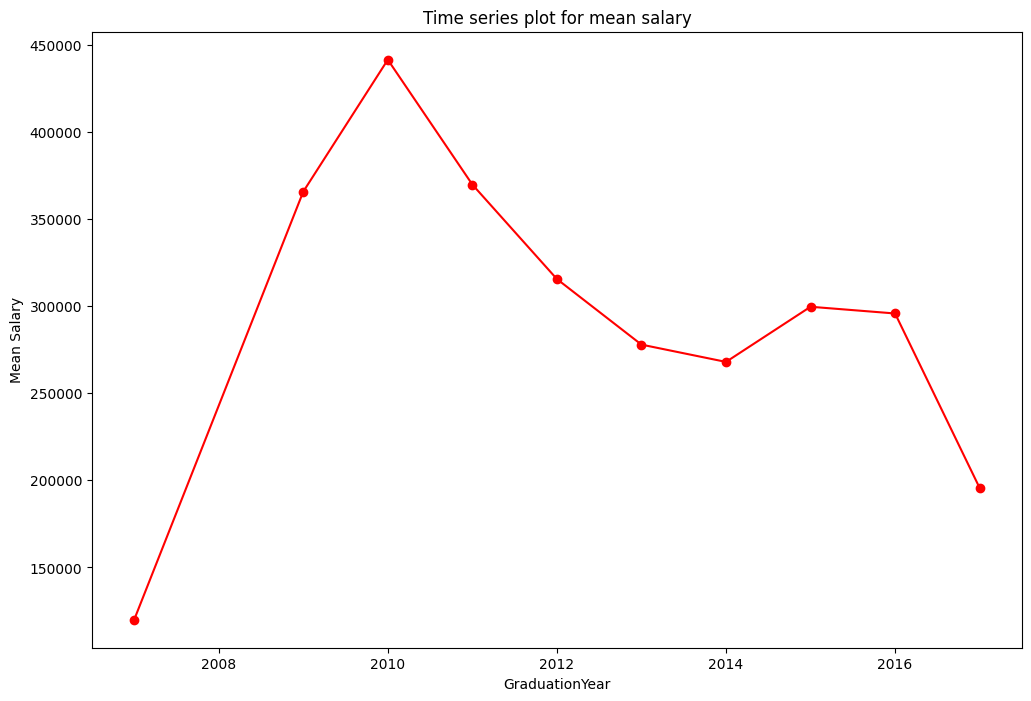

In [30]:
plt.figure(figsize = (12,8))
num_df.groupby('GraduationYear')['Salary'].mean().plot(color='r',marker= 'o')
plt.title('Time series plot for mean salary')
plt.ylabel('Mean Salary')
plt.show()

## Observation: A rise in entry level average salaries of students till 2010. since 2010 there has been a sharp decline in the average salary every year uptil 2014. The salaries increases again from 2014 to 2015. A sharp decline again between 2016 and 2017.

In [31]:
#Feature Extraction
num_df['Birth Year'] = pd.to_datetime(num_df['DOB']).dt.year
num_df.drop('DOB',1,inplace=True)

In [32]:
num_df['Grad Age'] = num_df['GraduationYear'] - num_df['Birth Year']
num_df['GradAge_12th'] = num_df['12graduation'] - num_df['Birth Year']
num_df.drop(['12graduation','Birth Year','GraduationYear'],axis=1,inplace=True)

In [33]:
clean_df = pd.concat([cat_col,num_df],1)
clean_df.head()

,JobCity,Gender,10board,12board,CollegeTier,Degree,Specialization,CollegeCityTier,CollegeState,Salary,...,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Grad Age,GradAge_12th
0,bangalore,f,state board,state board,2,B.Tech/B.E.,Computers,0,Andhra Pradesh,420000,...,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,21,17
1,others,m,cbse,cbse,2,B.Tech/B.E.,Electrical/Electronics,0,Madhya Pradesh,500000,...,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,23,18
2,chennai,f,cbse,cbse,2,B.Tech/B.E.,information technology,0,Uttar Pradesh,325000,...,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,22,18
3,gurgaon,m,cbse,cbse,1,B.Tech/B.E.,Computers,1,Delhi,1100000,...,0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,22,18
4,others,m,cbse,cbse,2,B.Tech/B.E.,Electrical/Electronics,0,Uttar Pradesh,200000,...,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,21,17


In [34]:
numerical_features = [feature for feature in clean_df.columns if clean_df[feature].dtype != 'O']
categorical_features = [feature for feature in clean_df.columns if clean_df[feature].dtype == 'O']

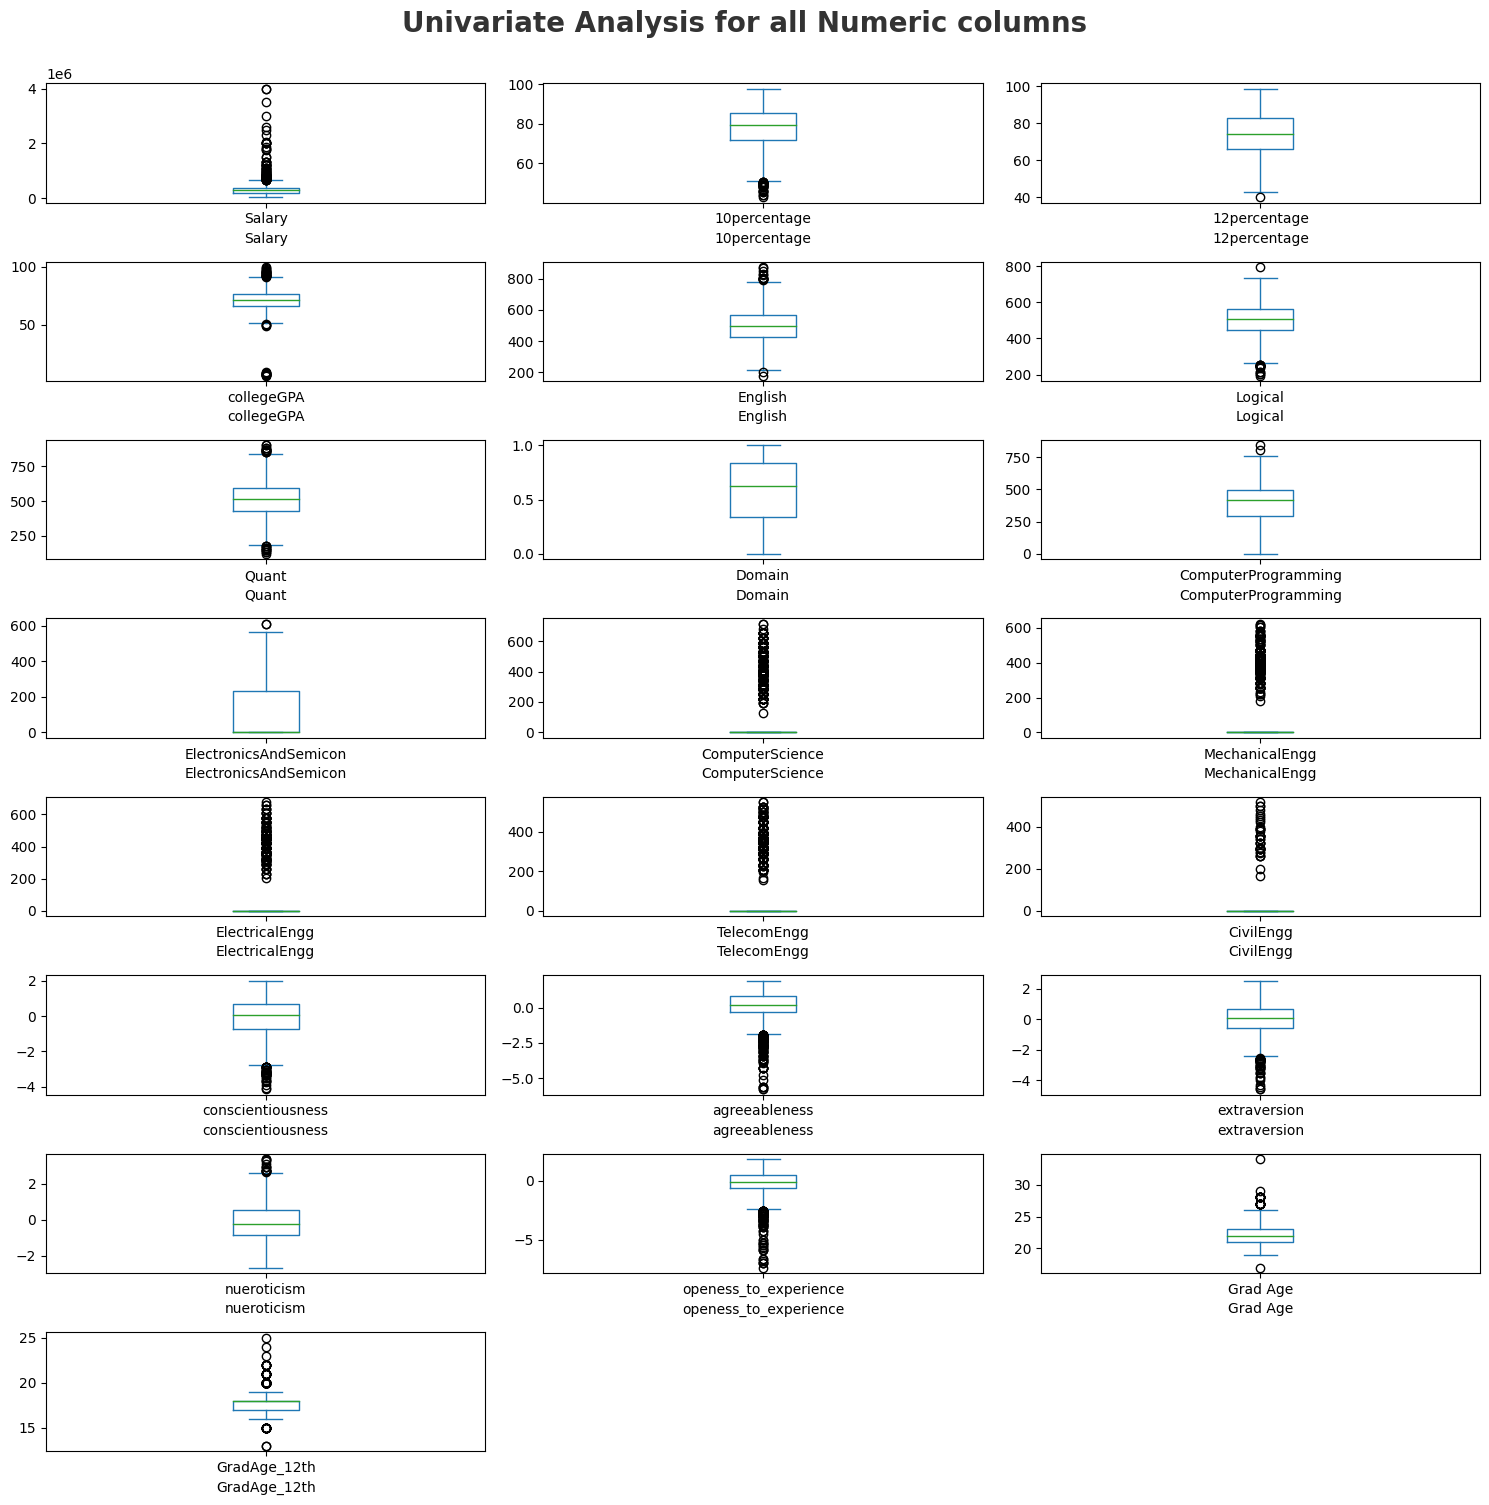

In [35]:
plt.figure(figsize=(15, 15))
plt.suptitle("Univariate Analysis for all Numeric columns", fontsize=20, fontweight='bold', alpha=0.8, y=1.)

num_cols = len(numerical_features)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)  # Calculate the number of rows needed

for i in range(num_cols):
    plt.subplot(num_rows, 3, i+1)
    clean_df[numerical_features[i]].plot(kind="box")
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

plt.show()


### Observation: These columns are optional subject columns, and if the subject has not been opted, the same has been replaced with 0. Therefore, I am not considering such columns for outlier analysis since all the points other than 0 will be considered as an outlier.

In [36]:
cols_for_outlier = clean_df[num_df.columns].columns.drop(['ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg'])

In [37]:
q1 = clean_df[cols_for_outlier].quantile(0.25)
q3 = clean_df[cols_for_outlier].quantile(0.75)
iqr = q3-q1
ub= q3 + 1.5*iqr
lb = q1 - 1.5*iqr

new_df = clean_df[~((clean_df[cols_for_outlier] < lb) | (clean_df[cols_for_outlier] > ub)).any(axis=1)]

### Note:  Very neglegible decrease in the number of records Removing outliers except in the following columns 'ComputerProgramming','ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg','ElectricalEngg', 'TelecomEngg', 'CivilEngg' since skew is merely because of absence of that test (which has been replaced with 0 value)

In [38]:
new_df.shape

(3469, 31)

In [39]:
# Storing category and numerical column names in separte variables
numerical_features = [feature for feature in new_df.columns if new_df[feature].dtype != 'O']
categorical_features = [feature for feature in new_df.columns if new_df[feature].dtype == 'O']

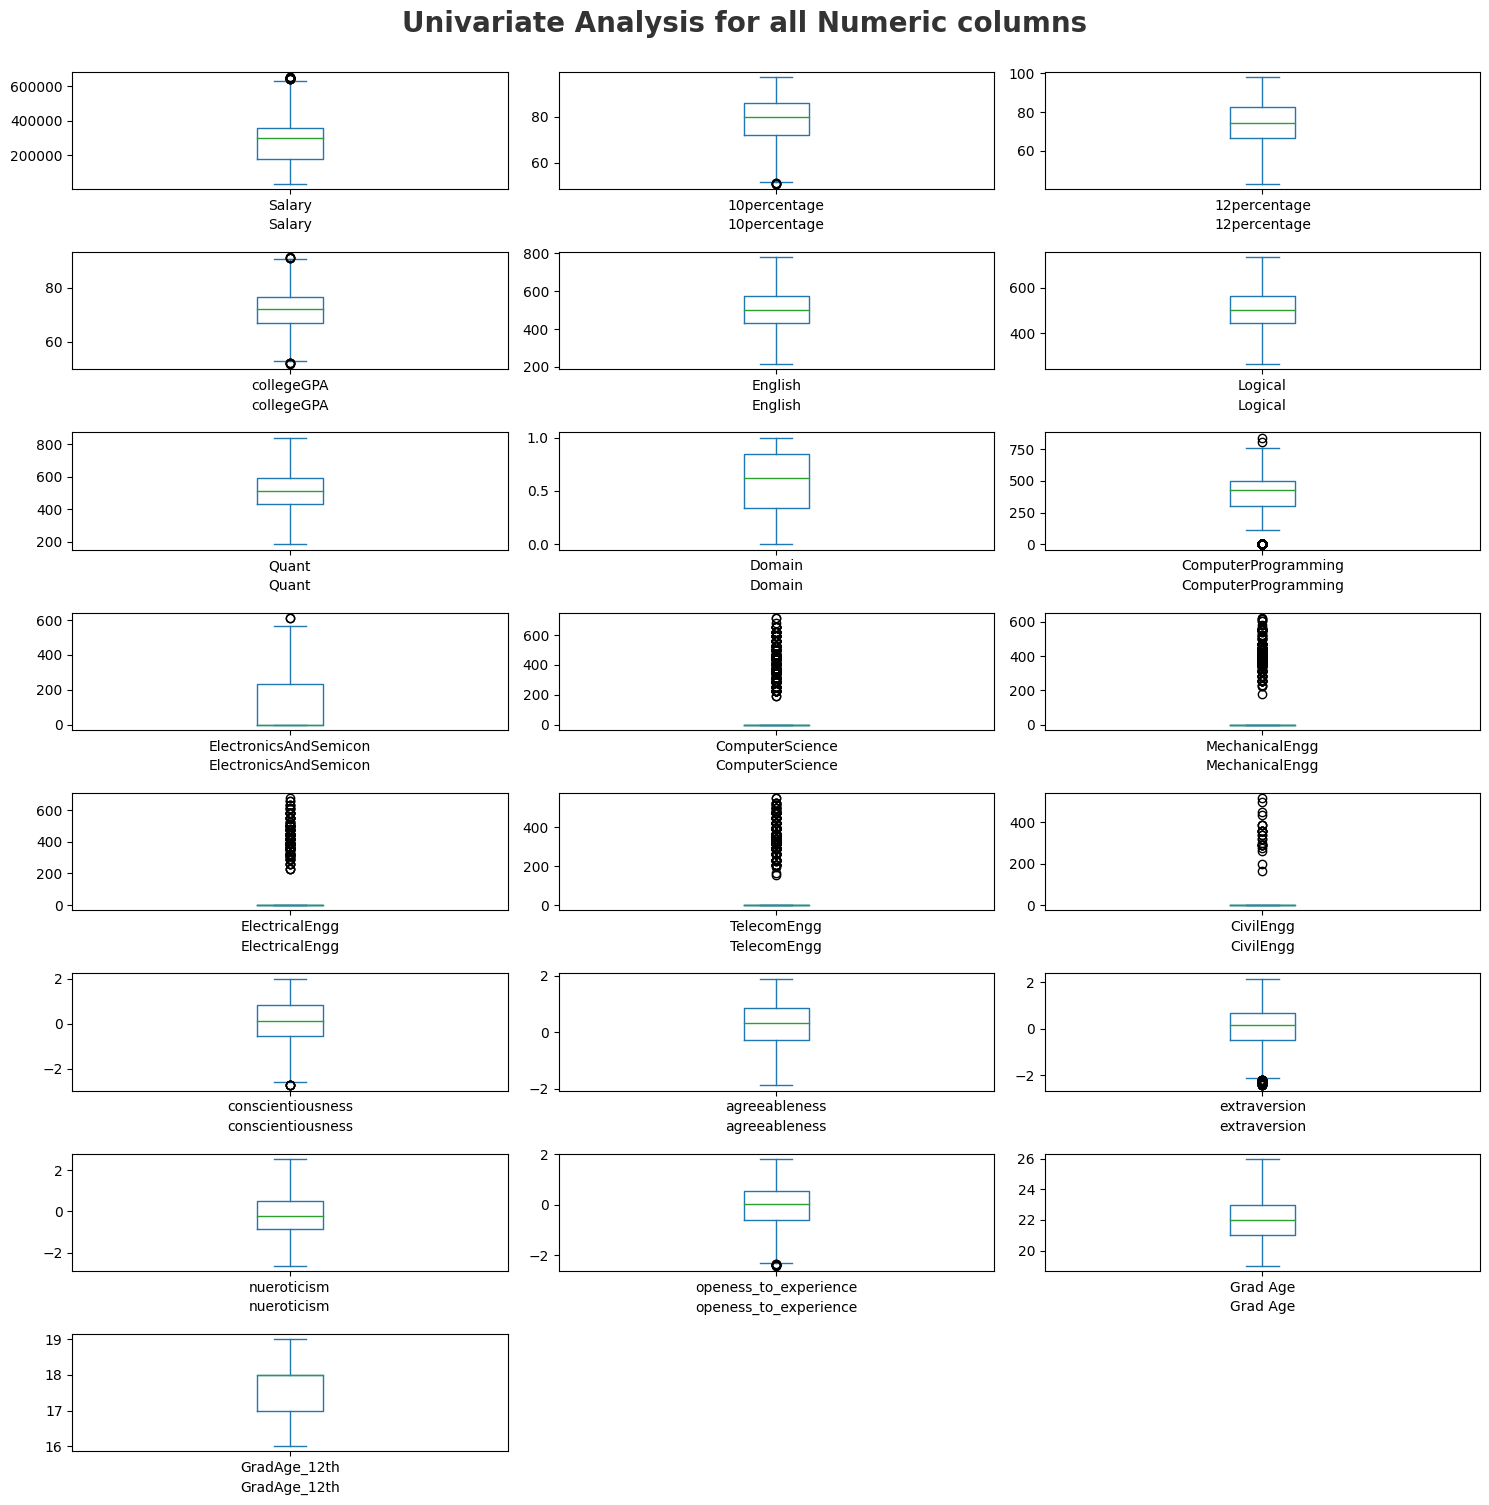

In [40]:
plt.figure(figsize=(15, 15))
plt.suptitle("Univariate Analysis for all Numeric columns", fontsize=20, fontweight='bold', alpha=0.8, y=1.)

num_cols = len(numerical_features)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)  # Calculate the number of rows needed

for i in range(num_cols):
    plt.subplot(num_rows, 3, i+1)
    new_df[numerical_features[i]].plot(kind="box")
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

plt.show()


## Oservation: Except few columns, The Outliers have been treated and the data looks more normal

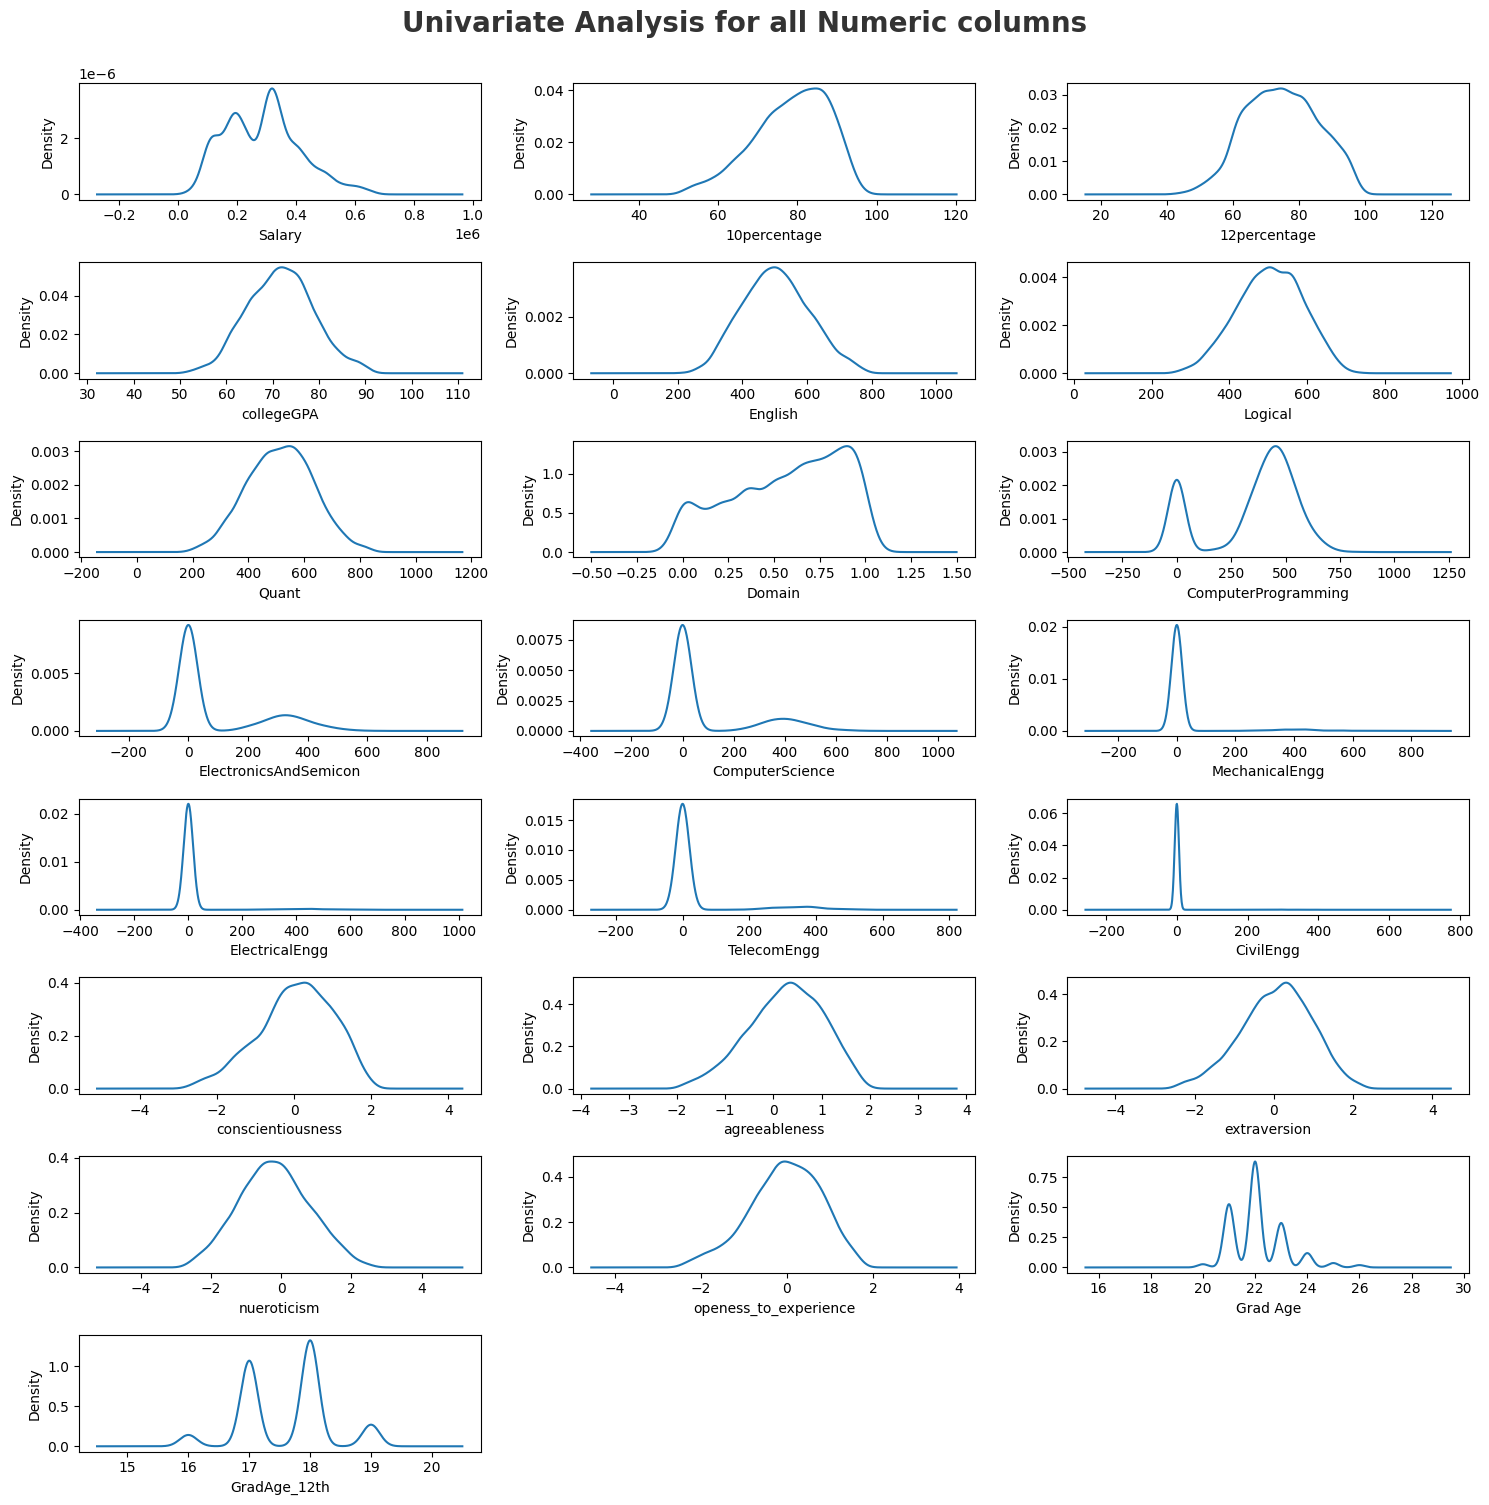

In [41]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis for all Numeric columns",fontsize = 20,fontweight ='bold',alpha=0.8,y=1.)

num_cols = len(numerical_features)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)  # Calculate the number of rows needed
for i in range(num_cols):
    plt.subplot(num_rows, 3, i+1)
    new_df[numerical_features[i]].plot(kind="kde")
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

plt.show()


In [42]:
categorical_features

['JobCity',
 'Gender',
 '10board',
 '12board',
 'CollegeTier',
 'Degree',
 'Specialization',
 'CollegeCityTier',
 'CollegeState']

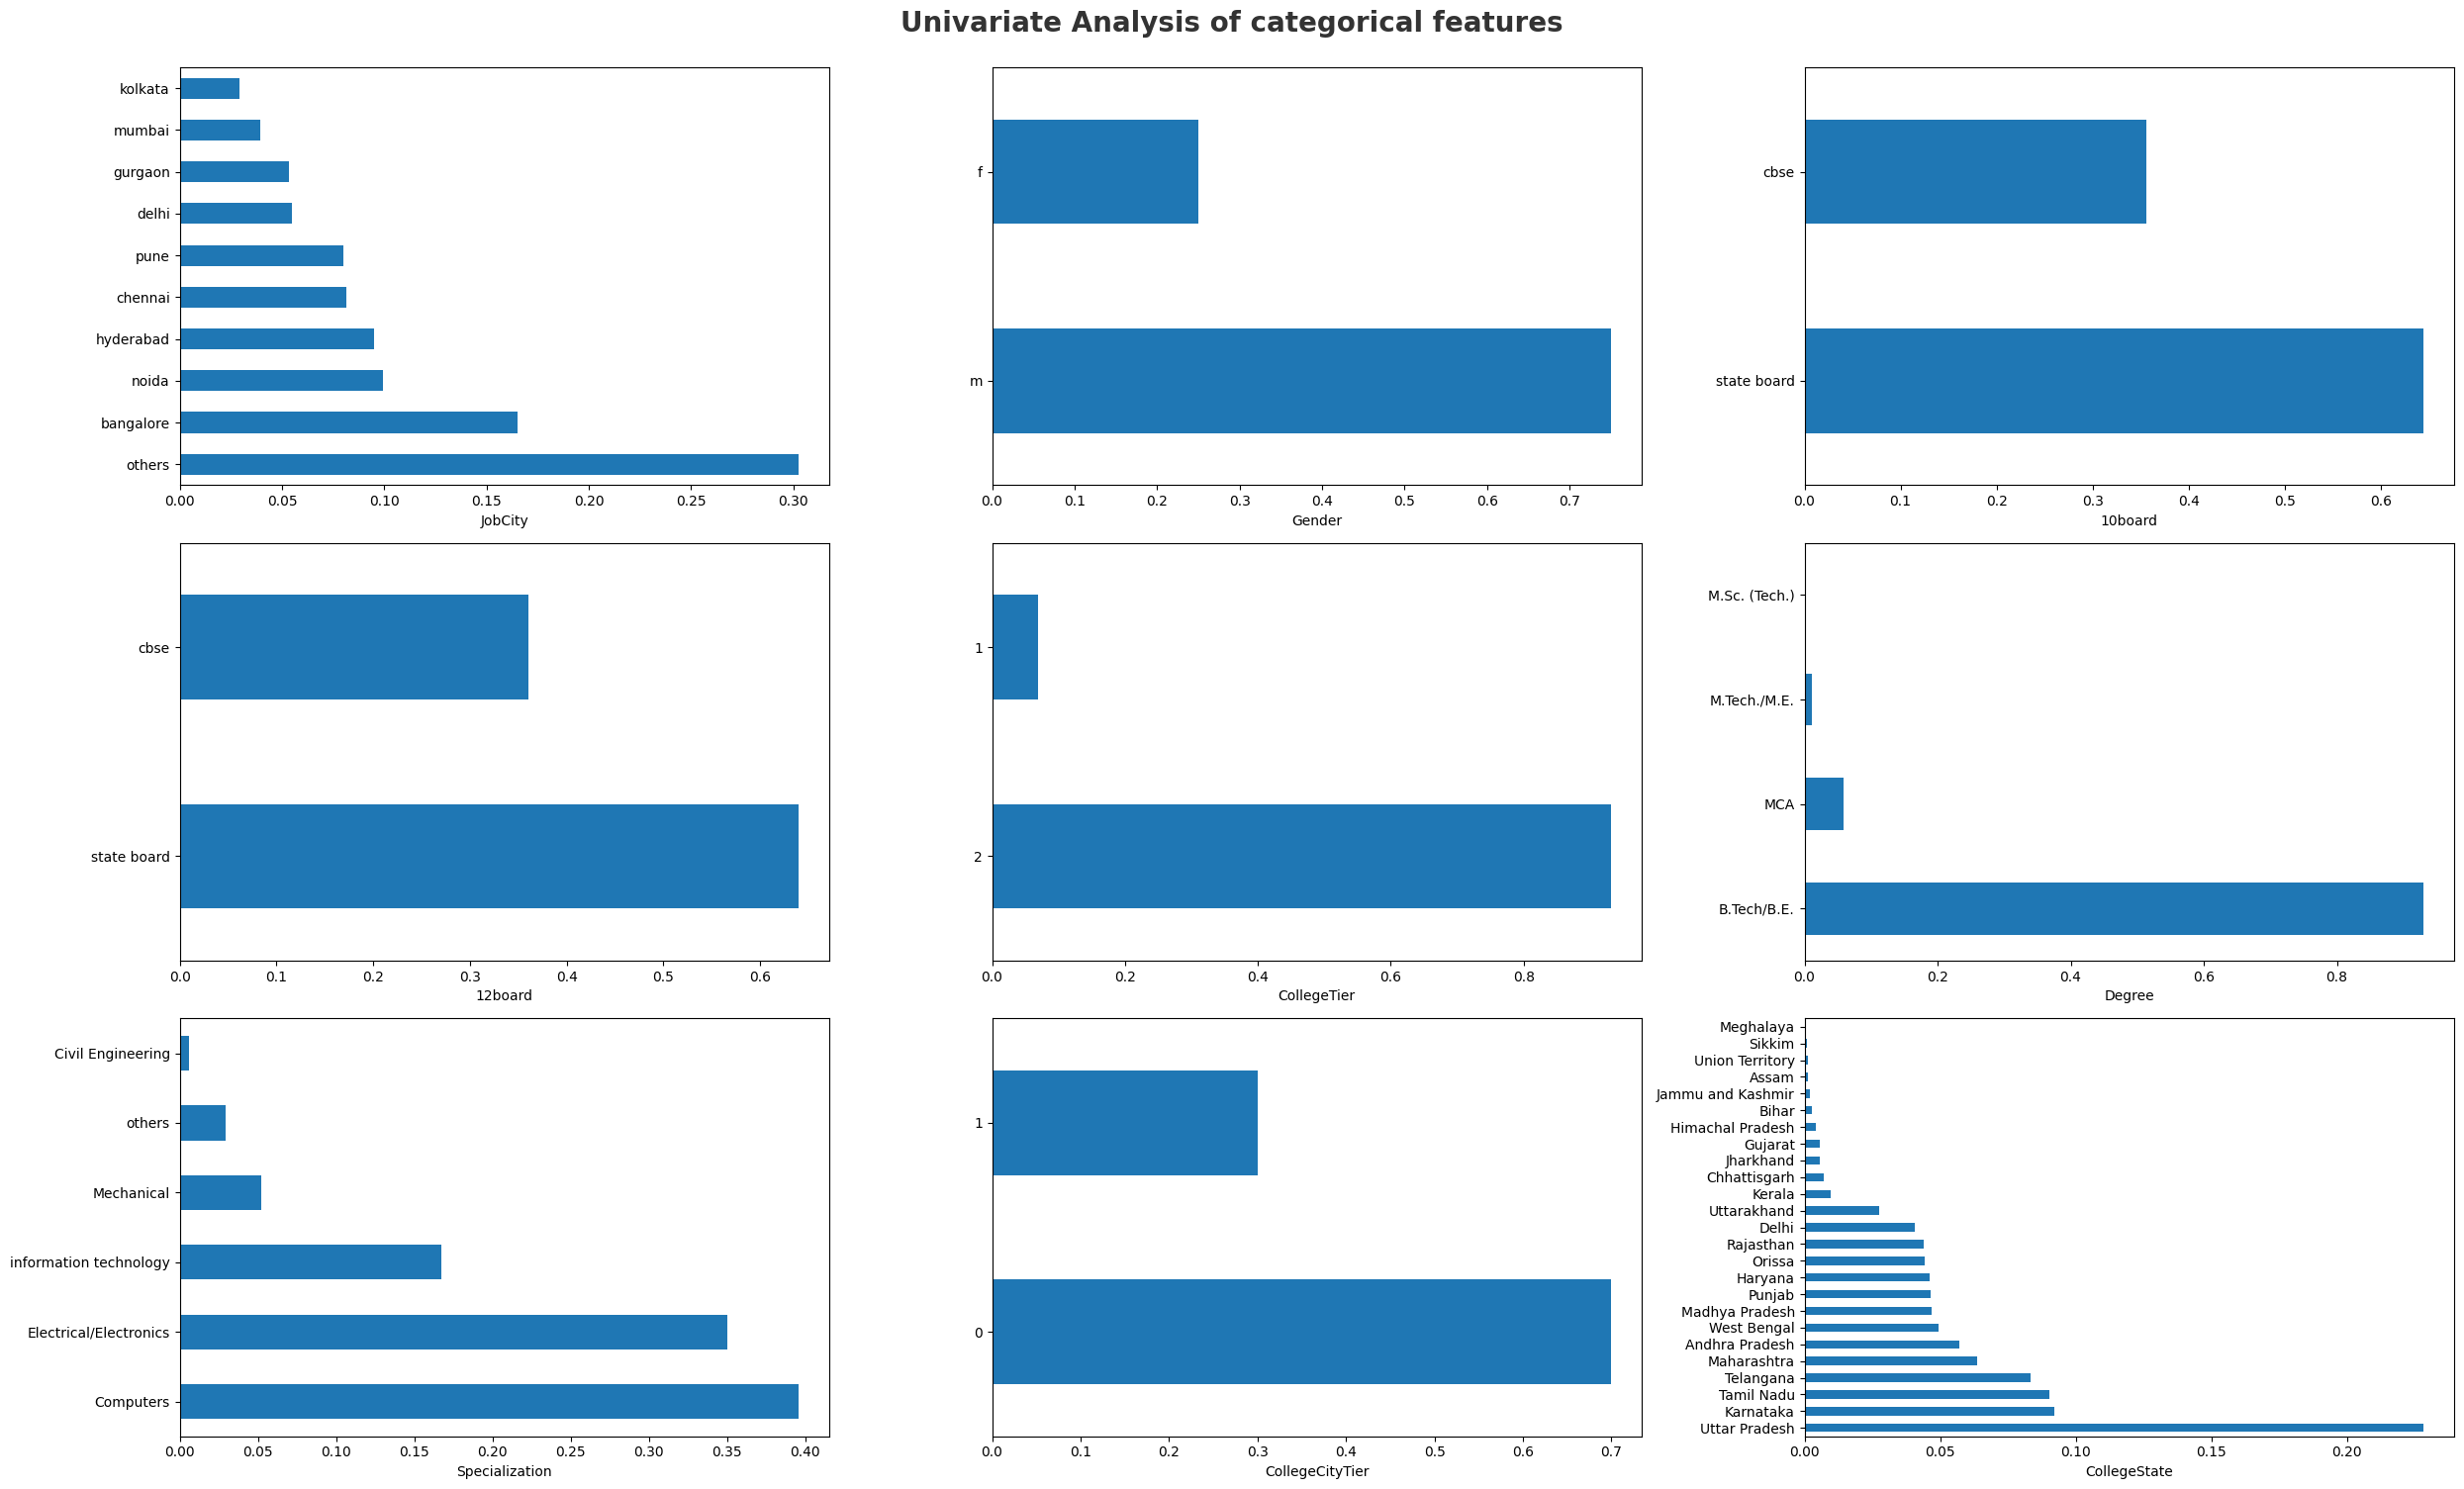

In [43]:
import math

plt.figure(figsize=(25, 15))
plt.suptitle("Univariate Analysis of categorical features", fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = ['JobCity', 'Gender', '10board', '12board', 'CollegeTier', 'Degree', 'Specialization', 'CollegeCityTier', 'CollegeState']

num_cols = 3  # You can adjust the number of columns based on your preference
num_rows = math.ceil(len(cat1) / num_cols)  # Calculate the number of rows needed

for i in range(len(cat1)):
    plt.subplot(num_rows, num_cols, i+1)
    new_df[cat1[i]].value_counts(normalize=True).plot(kind="barh")
    plt.xlabel(cat1[i])
    plt.tight_layout()

plt.show()

### Observations:
- Most of the engineeringg students in the data are males
- Majority of the students in 10th and 12th standard are from the state board followed central board.
- Tier 2 colleges dominate the data just like they dominate in the real world meaning that only a few colleges are tier 1
- B Tech/ B.E clearly dominates other degrees
- The specialization has been manually categorized into 6 with majority of students specializing in computer science,
  followed by Electronics/Electrical, IT, Mechanical and others
- Majority of the data belongs to students who went to a college in Uttar Pradesh

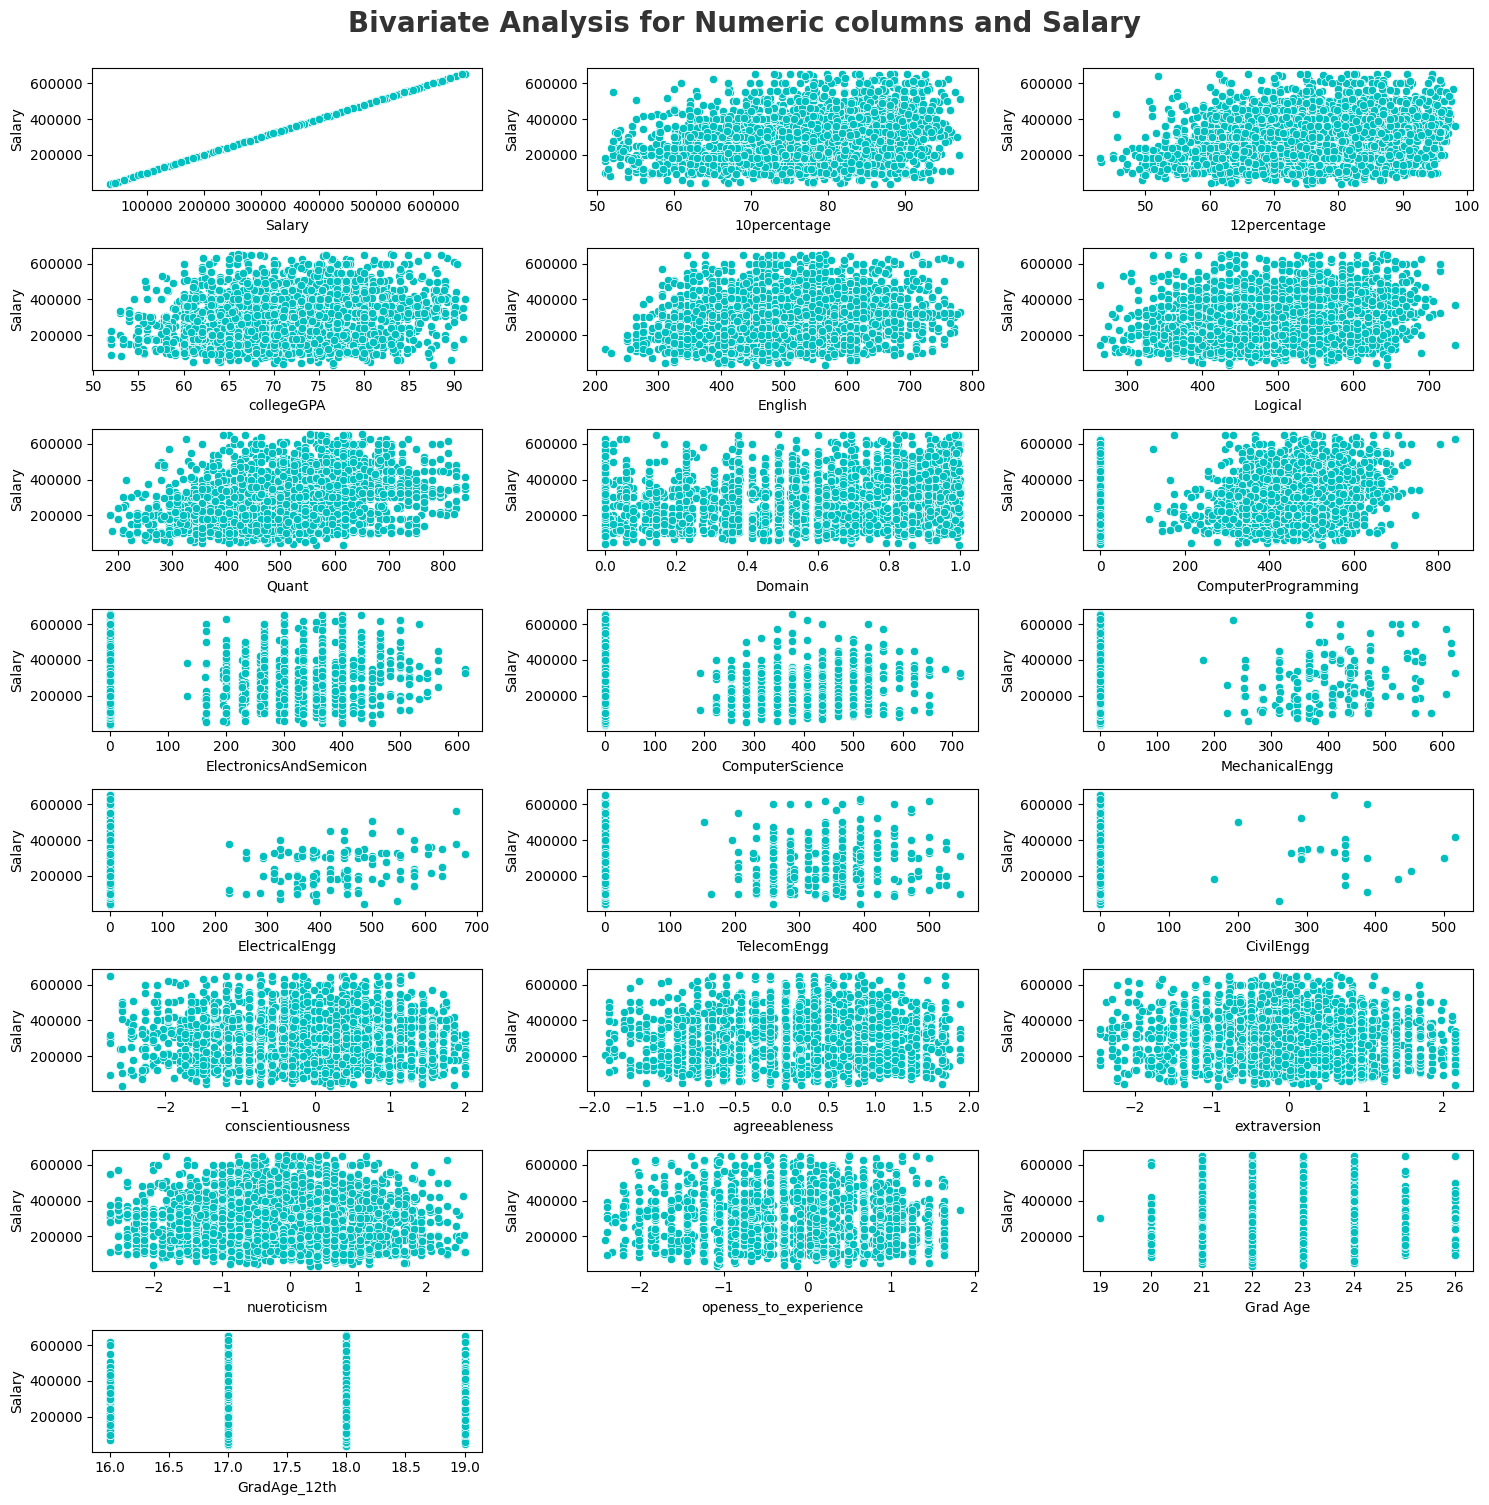

In [44]:
plt.figure(figsize=(15, 15))
plt.suptitle("Bivariate Analysis for Numeric columns and Salary", fontsize=20, fontweight='bold', alpha=0.8, y=1.)

num_cols = len(numerical_features)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)  # Calculate the number of rows needed

for i in range(num_cols):
    plt.subplot(num_rows, 3, i+1)
    sns.scatterplot(x=numerical_features[i], y='Salary', data=new_df, color='c')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

plt.show()


<Axes: >

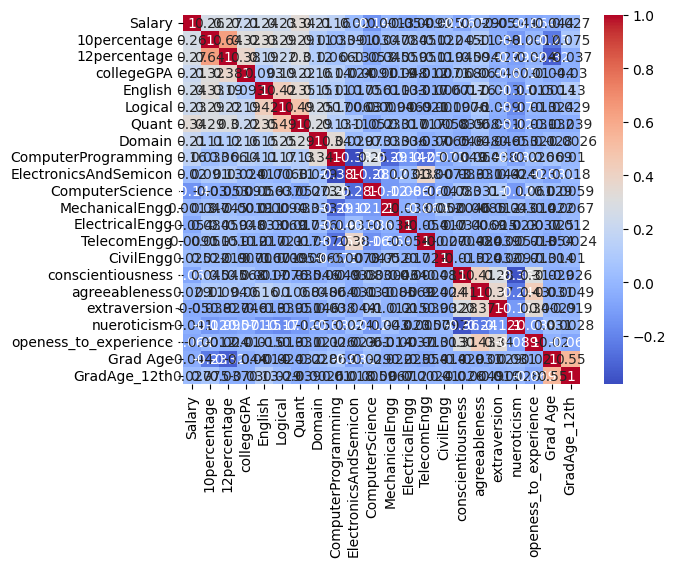

In [45]:
corr_matrix = new_df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

## Observation:
- None of the features is showing a very strong linear relationship with the target variable salary.
- Out of all the given variables, it appears that quant skills are the most important in terms of pearson's correlation coefficient.
- 10th percentage is positively correlated with 12th percentage
- Scores in AMCAT's Logical aptitude test is having a positive correlation (moderate) with English and Quant
- In the AMCAT's personality test, it appears that openess to experience in a personality is having a 44% positive correlation with agreeableness in the candidates 

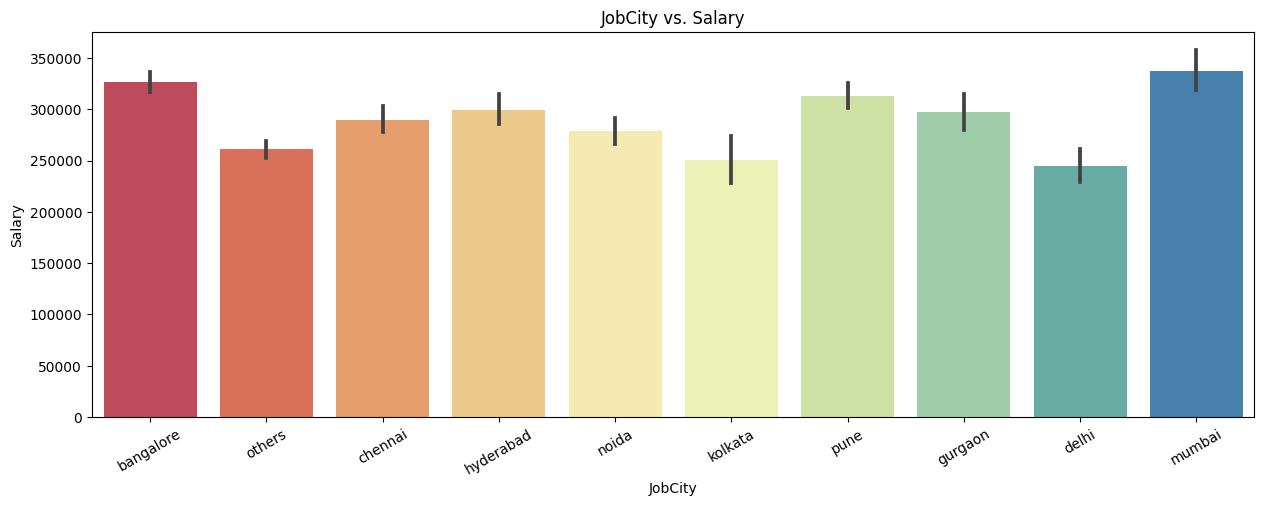

In [47]:
plt.figure(figsize=(15,5))
plt.title('JobCity vs. Salary'.format(i))
sns.barplot('JobCity','Salary',data=new_df,palette='Spectral')
plt.xticks(rotation=30)    
plt.show()

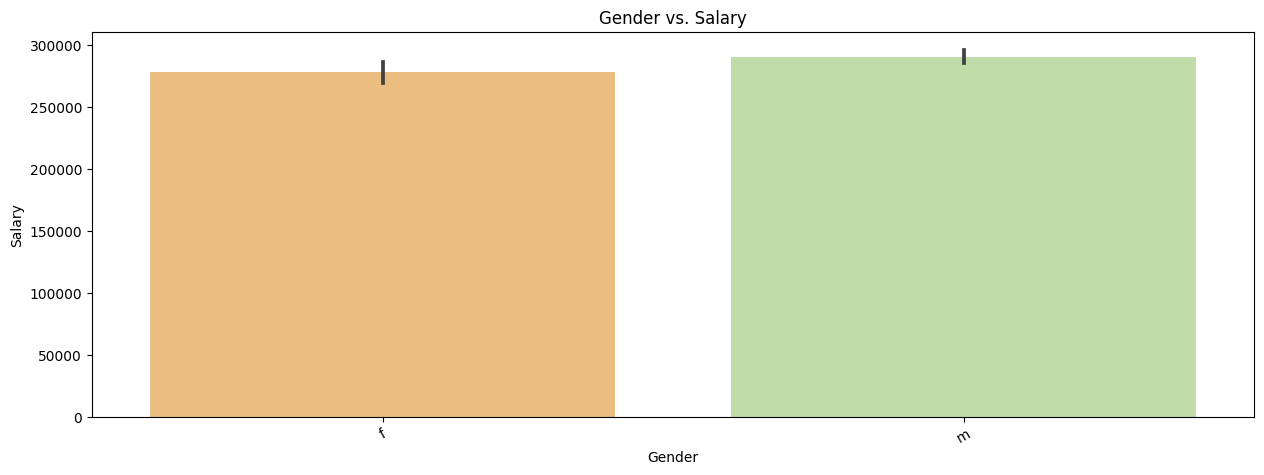

In [52]:
plt.figure(figsize=(15,5))
plt.title('Gender vs. Salary'.format(i))
sns.barplot('Gender','Salary',data=new_df,palette='Spectral')
plt.xticks(rotation=30)    
plt.show()

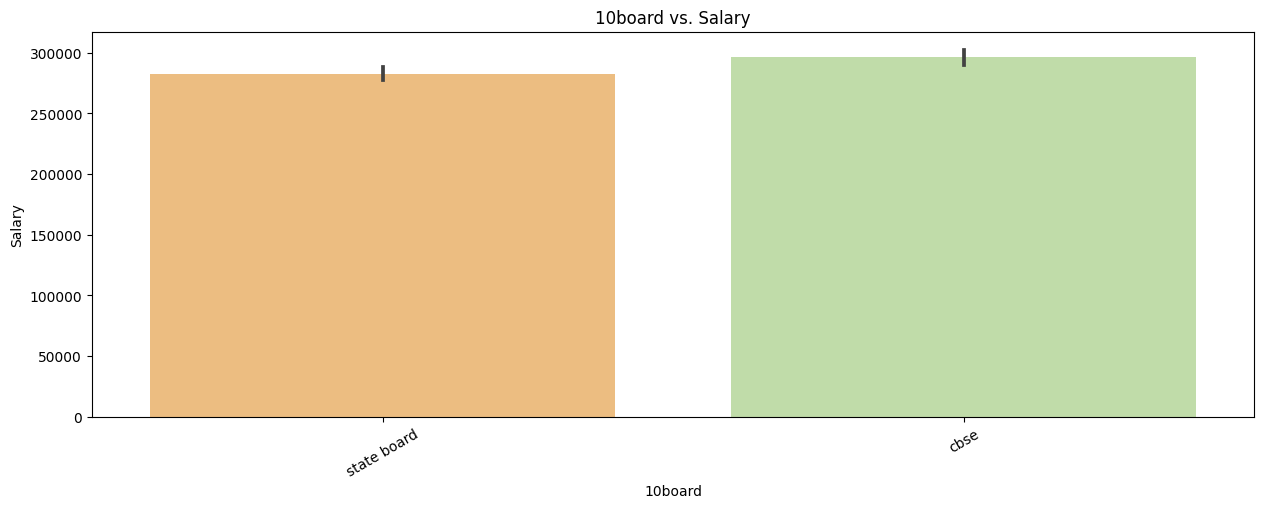

In [53]:
plt.figure(figsize=(15,5))
plt.title('10board vs. Salary'.format(i))
sns.barplot('10board','Salary',data=new_df,palette='Spectral')
plt.xticks(rotation=30)    
plt.show()

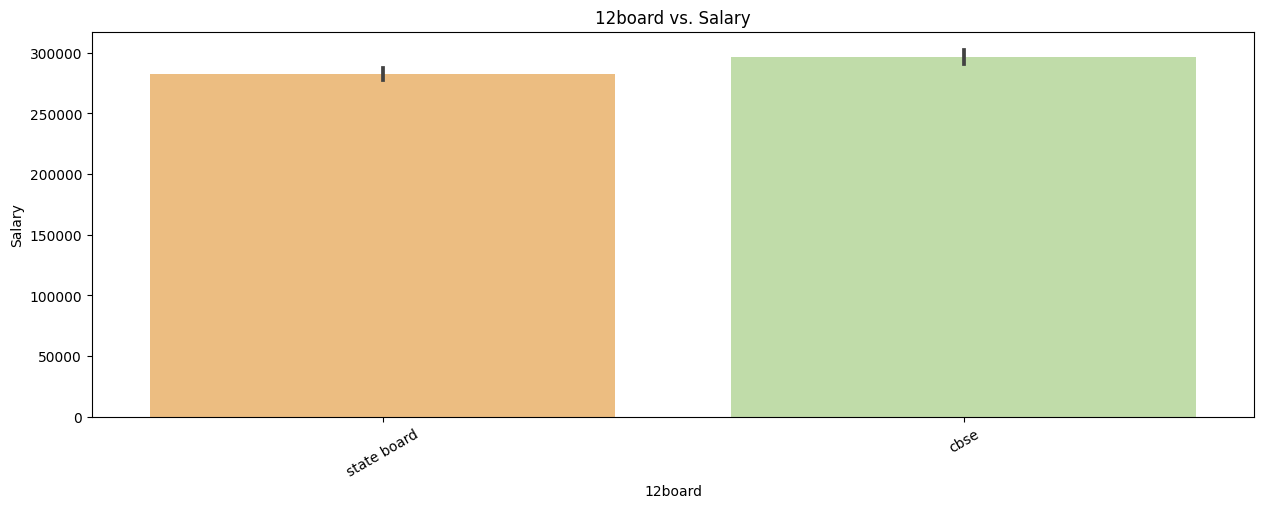

In [54]:
plt.figure(figsize=(15,5))
plt.title('12board vs. Salary'.format(i))
sns.barplot('12board','Salary',data=new_df,palette='Spectral')
plt.xticks(rotation=30)    
plt.show()

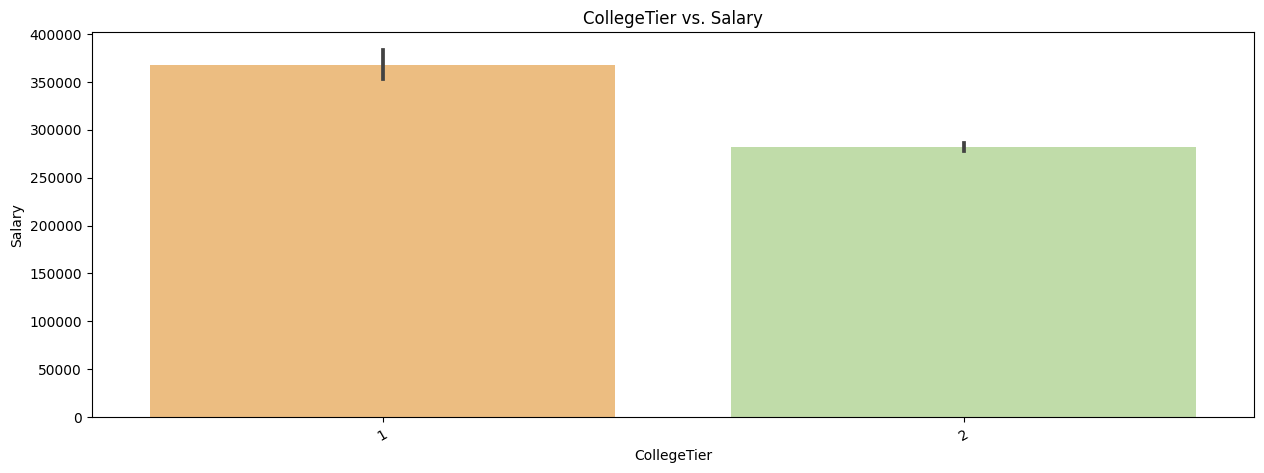

In [55]:
plt.figure(figsize=(15,5))
plt.title('CollegeTier vs. Salary'.format(i))
sns.barplot('CollegeTier','Salary',data=new_df,palette='Spectral')
plt.xticks(rotation=30)    
plt.show()

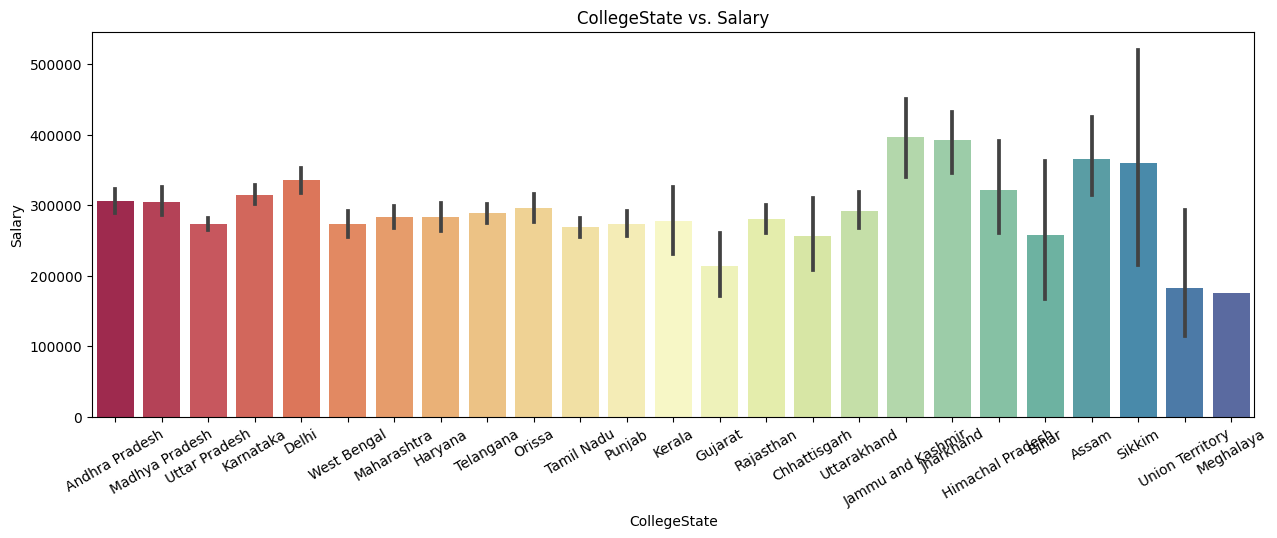

In [58]:
plt.figure(figsize=(15,5))
plt.title('CollegeState vs. Salary'.format(i))
sns.barplot('CollegeState','Salary',data=new_df,palette='Spectral')
plt.xticks(rotation=30)    
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Specializtion vs. Salary'.format(i))
sns.barplot('Specialization','Salary',data=new_df,palette='Spectral')
plt.xticks(rotation=30)    
plt.show()

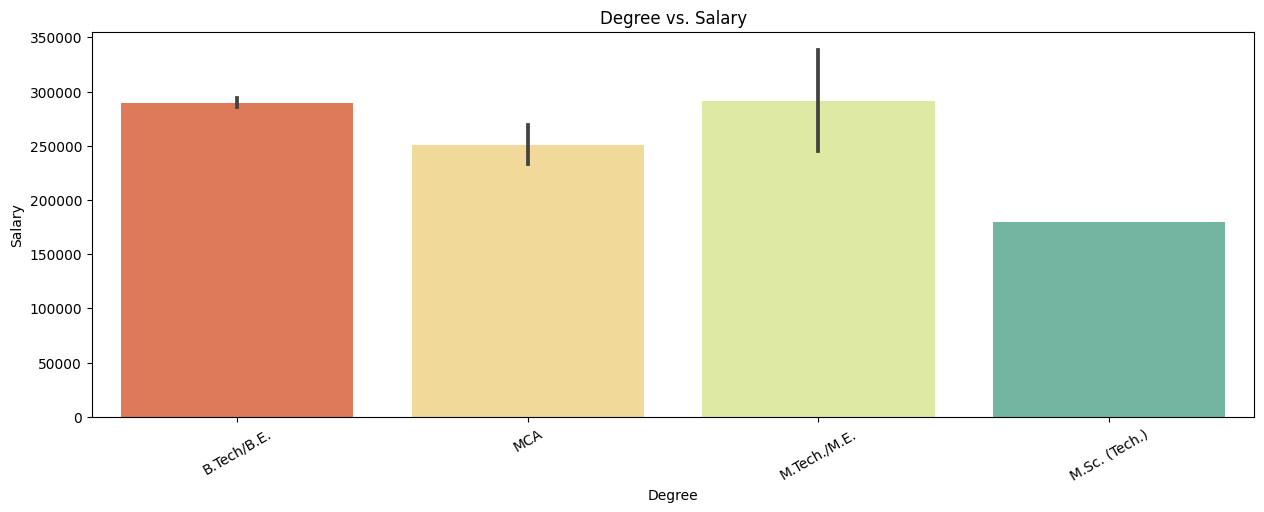

In [56]:
plt.figure(figsize=(15,5))
plt.title('Degree vs. Salary'.format(i))
sns.barplot('Degree','Salary',data=new_df,palette='Spectral')
plt.xticks(rotation=30)    
plt.show()

## Oservations:
- Mumbai,Bangalore,Pune and Hyderabad have the highest entry level mean salary while it is surprising to note that cities like Delhi and kolkata have the lowest entry level salaries for engineering graduates.
- Mean salary of males appear slighly more than females. However,this needs to confirmed statstically using t-test
- Board appears to be having significant difference in the salary of students with CBSE having higher mean salary. The same needs to be confirmed statistically
- Mean Salary of tier 1 collegees appear to be significantly higher than tier 2 colleges
- Mean salary of Mtech / M.E and Btech / B.E students appear to be slighly higher than other degrees.
- Average Starting salary of students having Specialization in Civil Engineering is higher relative to other fields

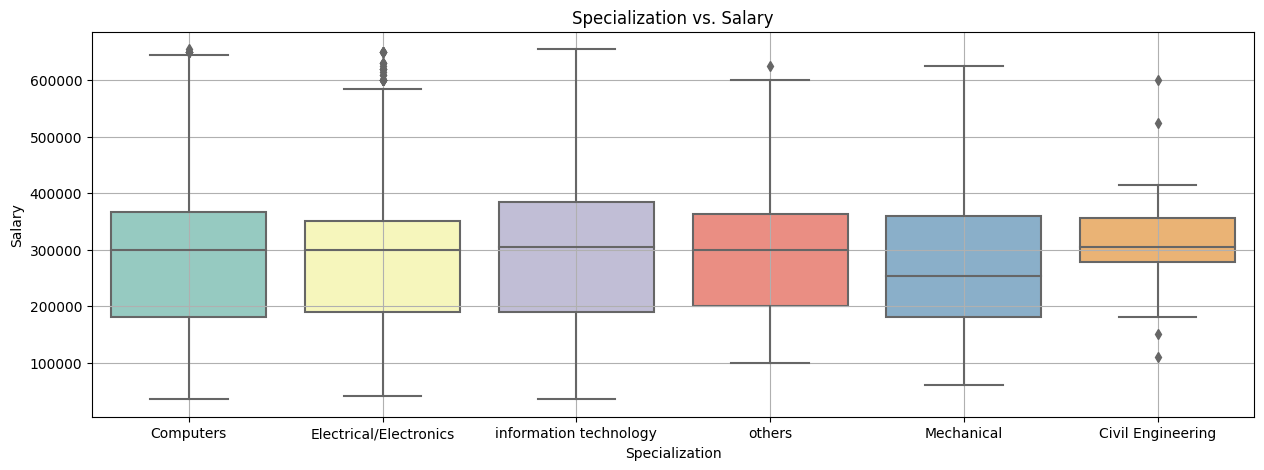

In [47]:
plt.figure(figsize=(15,5))
plt.title('Specialization vs. Salary')
sns.boxplot('Specialization','Salary',data=new_df,palette='Set3')
plt.xticks()
plt.grid()
plt.show()

## Observation: The lower salary quartile (first quartile) of civil engineering students is higher than any other specialization.

In [48]:
import scipy.stats as stats
for i in ['Degree']:
    s1 = new_df[new_df[i]==new_df[i].unique()[0]]['Salary']
    s2 = new_df[new_df[i]==new_df[i].unique()[1]]['Salary']
    s3 = new_df[new_df[i]==new_df[i].unique()[2]]['Salary']
    s4 = new_df[new_df[i]==new_df[i].unique()[3]]['Salary']
    print(i)
    print(stats.f_oneway(s1,s2,s3,s4))
    print()

Degree
F_onewayResult(statistic=6.38876520642902, pvalue=0.00025867790455979275)



## Conclusion:
### Brief about data-
- Most of the engineering students in the data are males.
- Majority of the students in 10th and 12th standard are from state board followed by CBSE board.
- Tier 2 colleges dominate the data just like they dominate in the real world meaning that only a few colleges are tier 1 colleges
- B Tech/ B.E clearly dominates other degrees in terms of frequency of occurrence
- The specialization has been manually categorized into 5 buckets with majority of students specializing in computer science, followed by Electronics/Electrical, IT, Mechanical and others.
- Majority of the data belongs to students who went to a college in Uttar Pradesh
  Data was checked for all the assumptions of linear regression and all of them were duly satisfied!
  
### Findings -
- A rise in entry level average salaries of students from 2007 till 2010. Since 2010 there was a sharp decline in the average entry level salaries of engineering students every year up till 2014. The salaries increased again from 2014 to 2015. However, there was a sharp decline again between 2016 and 2017. This suggests that the average salaries of students have shown a sharp decline since 2010. Such a negative rate of growth is a cause for concern.

- Out of all the given variables, it appears that quant skills are the most important in terms of pearson's correlation coefficient. This means higher the score of candiate in quant, higher are the chances of having better salary prospects!

- 10th percentage is positively correlated with 12th percentage

- Scores in AMCAT's Logical aptitude test is having a positive correlation (moderate) with English and Quant tests

- In the AMCAT's personality test, it appears that openness to experience is having a 44% positive correlation with agreeableness in the candidates.

- Mumbai, Bangalore, Pune and Hyderabad have the highest entry level salary while it is surprising to note that cities like Delhi and Kolkata have the lowest entry level salaries for engineering graduates. This was a shocker since these are the metropolitans!

- Mean salary of Mtech / M.E and Btech / B.E students appear to be slighly higher than other degrees.
- Another interesting insight is that lower salary quartile (first quartile) of civil engineering students is higher than any other specialization. So do advice your juniors to choose civil engineering !